# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Exercises

### Exercise - Classification

In this exercise, you will build a classification model to predict whether a student gets admitted into a university. Use the dataset in `datasets/students.txt`.

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression or decision tree. For each training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

1. Perform an exploratory data analysis and if necessary takes decision about feature scaling and encoding.
2. Build the model using both logistic regression and decision tree and compare results on the test set.
3. Plot confusion matrices of your models. Which one performs better on true positives? and which one on true negatives?
4. Plot the dataset and decision boundaries for both the models, how do these boundaries change?

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import scipy.io as sio
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (   roc_curve,
                                roc_auc_score,
                                precision_recall_curve,
                                f1_score,
                                auc,
                                classification_report,
                                confusion_matrix)


In [2]:
url = 'https://raw.githubusercontent.com/oscar-defelice/DSAcademy-lectures/master/Lectures_src/03.Supervised_learning/datasets/students.txt'
df = pd.read_csv(url, names = ['exam1', 'exam2', 'admission'])

df.head()

,exam1,exam2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   exam1      805 non-null    float64
 1   exam2      805 non-null    float64
 2   admission  805 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 19.0 KB


In [4]:
df.describe()

,exam1,exam2,admission
count,805.000000,805.000000,805.000000
mean,61.915671,64.501242,0.484472
std,18.556445,17.799392,0.500070
min,30.058822,30.603263,0.000000
25%,46.131485,48.642842,0.000000
50%,61.505324,63.913054,0.000000
75%,76.987760,81.250948,1.000000
max,99.827858,98.869436,1.000000


In [5]:
df2 = df
df2['somma esami'] = df2['exam1']+df2['exam2']
df2.head()

,exam1,exam2,admission,somma esami
0,34.623660,78.024693,0,112.648352
1,30.286711,43.894998,0,74.181708
2,35.847409,72.902198,0,108.749607
3,60.182599,86.308552,1,146.491151
4,79.032736,75.344376,1,154.377112


<AxesSubplot:xlabel='somma esami', ylabel='admission'>

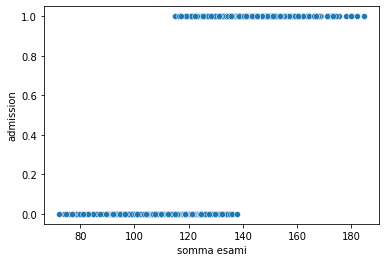

In [6]:
sns.scatterplot(x='somma esami', y='admission', data=df2)

In [7]:
X = df.drop(['admission', "somma esami"], axis=1).values
y = df['admission'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

In [8]:
#logistic regression
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train,y_train);

In [9]:
pred = logreg.predict(X_test)
print(pred)

[0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1
 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1
 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1
 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0]


In [10]:
#calcolo accuracy

l=[]
for i in range (len(pred)):
    if pred[i]==y_test[i]:
        l.append(1)
score = sum(l)/len(y_test)

print(score)

0.8712871287128713


In [11]:
print(logreg.score(X_test, y_test))

0.8712871287128713


In [12]:
#decision tree
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train,y_train);

In [13]:
pred_tree = clf.predict(X_test)
print(pred_tree)

[0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0
 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0
 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0
 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0]


In [14]:
print(clf.score(X_test, y_test))

0.905940594059406


In [15]:
l2=[]
for i in range (len(pred_tree)):
    if pred_tree[i]==y_test[i]:
        l2.append(1)
score2 = sum(l2)/len(y_test)

print(score2)

0.905940594059406


In [16]:
print("Log Reg Confusion and Clasification Report")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Log Reg Confusion and Clasification Report
[[91 13]
 [13 85]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       104
           1       0.87      0.87      0.87        98

    accuracy                           0.87       202
   macro avg       0.87      0.87      0.87       202
weighted avg       0.87      0.87      0.87       202



Confusion Matrix Heatmap Logistic Regresson


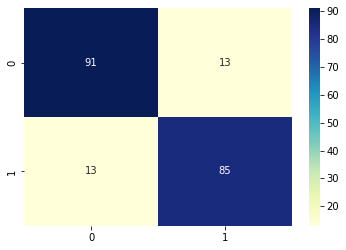

In [17]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True,cmap="YlGnBu")
print("Confusion Matrix Heatmap Logistic Regresson")

In [18]:
print("Dec Tree Confusion and Clasification Report")
print(confusion_matrix(y_test, pred_tree))
print(classification_report(y_test, pred_tree))

Dec Tree Confusion and Clasification Report
[[97  7]
 [12 86]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       104
           1       0.92      0.88      0.90        98

    accuracy                           0.91       202
   macro avg       0.91      0.91      0.91       202
weighted avg       0.91      0.91      0.91       202



Confusion Matrix Heatmap Decision Tree


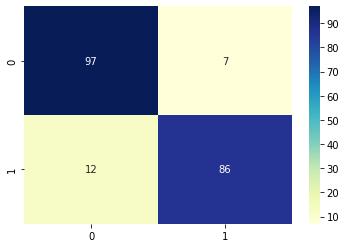

In [19]:
sns.heatmap(confusion_matrix(y_test, pred_tree),annot=True,cmap="YlGnBu")
print("Confusion Matrix Heatmap Decision Tree")

<AxesSubplot:xlabel='exam1', ylabel='exam2'>

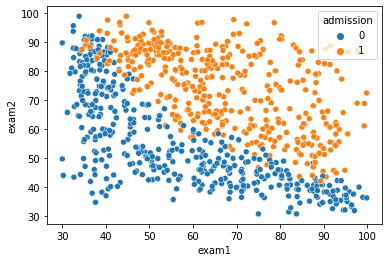

In [20]:
sns.scatterplot(x= "exam1" ,y="exam2", data = df,hue = "admission")

In [21]:
theta = logreg.coef_
print(theta)

[[0.06863452 0.0896397 ]]


In [22]:
inter = logreg.intercept_
print(inter)

[-10.04385551]


<AxesSubplot:xlabel='exam1', ylabel='exam2'>

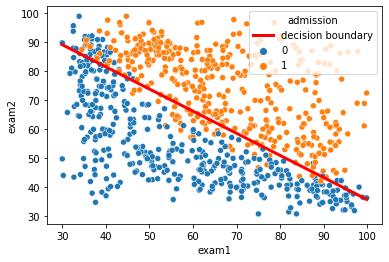

In [23]:
w1=theta[0,0]
w2=theta[0,1]

x = np.array([df["exam1"].min(),df["exam1"].max()])
y = -inter/w2 -(w1/w2)*x

plt.plot(x, y, label='decision boundary', color="r",lw=3)

sns.scatterplot(x= "exam1" ,y="exam2", data = df, hue = "admission")

In [24]:
!pip install ipywidgets==7.7.0

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [25]:
from helpers_Garden import visualize_tree


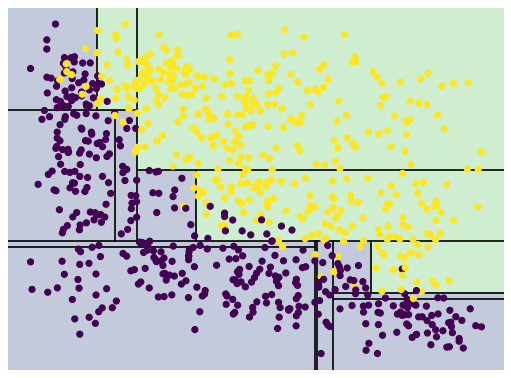

In [26]:
y = df['admission'].values

plt.figure(figsize=(8, 6), dpi=80)

visualize_tree(clf,X,y=y)


In [27]:
for i in range(2,6):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    print("profondità:", i, "||  score: ",model.score(X_test, y_test))

profondità: 2 ||  score:  0.8960396039603961
profondità: 3 ||  score:  0.900990099009901
profondità: 4 ||  score:  0.9108910891089109
profondità: 5 ||  score:  0.900990099009901


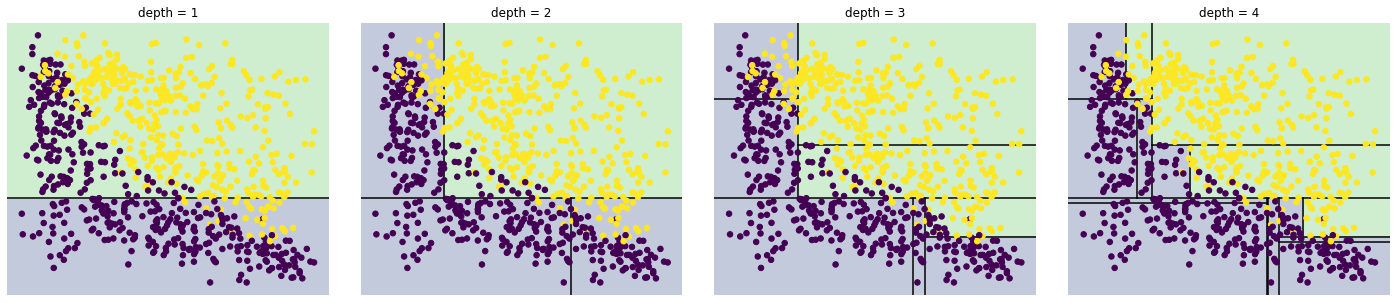

In [28]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

y = df['admission'].values

for axi, depth in zip(ax, range(1, 5)):
    clf_plot = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(clf_plot, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0c728897-17be-439a-8e36-036f2cc3dc37' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>